In [31]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import numpy as np

import math

#data = qu.bell_state('psi-').reshape(2, 2)
data=1/math.sqrt(2)*np.array([[1,0],[0,1]])
data2=np.array([[0,1],[-1,0]])
inds = ('k0', 'k1')
tags = ('KET',)

ket = qtn.Tensor(data=data, inds=('k0', 'b0'), tags=['ket'])
ket2 = qtn.Tensor(data=data, inds=('k1', 'b1'), tags=['bra'])
eps1 = qtn.Tensor(data=data2, inds=('k0', 'k1'), tags=['eps1'])
eps2 = qtn.Tensor(data=data2, inds=('b0', 'b1'), tags=['eps2'])
TN = ket2 & eps1 & eps2 & ket
TN.contract()

0.9999999999999998

In [26]:
eps2.data

array([[ 0,  1],
       [-1,  0]])

In [27]:
TN.contract()

0.0

In [29]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import numpy as np

import math

#data = qu.bell_state('psi-').reshape(2, 2)
data=1/math.sqrt(4)*np.array([[1,1],[1,1]])
data2=np.array([[0,1],[-1,0]])
inds = ('k0', 'k1')
tags = ('KET',)

ket = qtn.Tensor(data=data, inds=('k0', 'b0'), tags=['ket'])
ket2 = qtn.Tensor(data=data, inds=('k0', 'b0'), tags=['bra'])

TN = ket2  & ket
TN.contract()

1.0

In [4]:
X = qtn.Tensor(qu.pauli('X'), inds=('k0', 'b0'), tags=['PAULI', 'X', '0'])
Y = qtn.Tensor(qu.pauli('Y'), inds=('k1', 'b1'), tags=['PAULI', 'Y', '1'])

In [5]:
bra = qtn.Tensor(qu.rand_ket(4).reshape(2, 2), inds=('b0', 'b1'), tags=['BRA'])
bra.data

array([[ 0.02335428+0.32780166j, -0.1606998 -0.05801867j],
       [-0.133815  +0.88728234j, -0.18073608+0.15801306j]])

In [6]:
TN = ket.H & X & Y & bra
print(TN)

TensorNetwork([
    Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET'])),
    Tensor(shape=(2, 2), inds=('k0', 'b0'), tags=oset(['PAULI', 'X', '0'])),
    Tensor(shape=(2, 2), inds=('k1', 'b1'), tags=oset(['PAULI', 'Y', '1'])),
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags=oset(['BRA'])),
], tensors=4, indices=4)


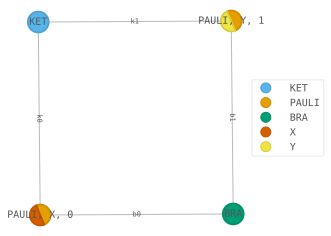

In [7]:
TN.draw(color=['KET', 'PAULI', 'BRA', 'X', 'Y'], figsize=(4, 4), show_inds='all')

In [12]:
TN.contract()


0

In [9]:
a=TN ^ ...
print(a)

(-0.5863779629072386-0.20825341281689896j)


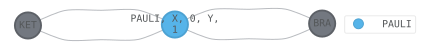

TensorNetwork([
    Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET'])),
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags=oset(['BRA'])),
    Tensor(shape=(2, 2, 2, 2), inds=('k0', 'b0', 'k1', 'b1'), tags=oset(['PAULI', 'X', '0', 'Y', '1'])),
], tensors=3, indices=4)


In [10]:
TNc = TN ^ 'PAULI'
TNc.draw('PAULI')
print(TNc)

In [11]:
TNc.arrays

(array([[ 0.        -0.j,  0.70710678-0.j],
        [-0.70710678-0.j,  0.        -0.j]]),
 array([[ 0.02335428+0.32780166j, -0.1606998 -0.05801867j],
        [-0.133815  +0.88728234j, -0.18073608+0.15801306j]]),
 array([[[[0.+0.j, 0.-0.j],
          [0.+0.j, 0.+0.j]],
 
         [[0.+0.j, 0.-1.j],
          [0.+1.j, 0.+0.j]]],
 
 
        [[[0.+0.j, 0.-1.j],
          [0.+1.j, 0.+0.j]],
 
         [[0.+0.j, 0.-0.j],
          [0.+0.j, 0.+0.j]]]]))

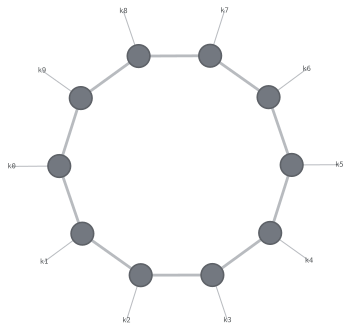

In [12]:
L = 10

# create the nodes, by default just the scalar 1.0
tensors = [qtn.Tensor() for _ in range(L)]

for i in range(L):
    # add the physical indices, each of size 2
    tensors[i].new_ind(f'k{i}', size=2)

    # add bonds between neighbouring tensors, of size 7
    tensors[i].new_bond(tensors[(i + 1) % L], size=7)


mps = qtn.TensorNetwork(tensors)
mps.draw()

In [13]:
ta = qtn.rand_tensor([2, 3], inds=['a', 'x'], tags='A')
tb = qtn.rand_tensor([4, 3], inds=['b', 'x'], tags='B')

ta.data

# matrix multiplication but with indices aligned automatically
b=ta @ tb
b.data

array([[-1.06611524, -0.41637999, -0.46554289, -1.22317922],
       [ 2.72118461,  0.51251215,  1.05629422,  1.81656266]])

In [14]:
# create a tensor with 5 legs
t = qtn.rand_tensor([2, 2, 2, 2, 2], inds=['a', 'b', 'c', 'd', 'e'])
print(t.data)
t.data[1][0][0][0][0]


[[[[[-4.91202948e-01 -2.95088522e-01]
    [-1.69556254e+00 -2.93120031e-02]]

   [[ 2.74738329e-01  4.82687164e-01]
    [-3.86829183e-01 -1.23096682e+00]]]


  [[[-1.30699615e+00 -3.46025588e-01]
    [-4.43347258e-01 -5.63946015e-01]]

   [[-4.70560875e-01 -3.74165976e-01]
    [ 1.52270599e-01 -8.13341924e-01]]]]



 [[[[-7.18036938e-01  3.60930573e-01]
    [-8.49079436e-01 -1.30835948e+00]]

   [[ 1.21791093e-03 -1.29922445e-01]
    [-4.09857508e-01 -1.72662990e+00]]]


  [[[ 4.10901294e-01 -5.16355072e-01]
    [ 6.30295639e-01  5.32159308e-01]]

   [[-1.62130670e-01 -1.03175152e+00]
    [ 4.01282288e-01  2.71456537e-01]]]]]


-0.7180369378793701

In [15]:
tn = t.split(['a'])
tn.arrays

# tn.draw(figsize=(3, 3))

(array([[-1.30239674, -1.08332773],
        [-1.32619695,  1.0638861 ]]),
 array([[[[[ 0.46077659, -0.02730585],
           [ 0.96506724,  0.51325613]],
 
          [[-0.10403178, -0.13208183],
           [ 0.30313923,  1.1267781 ]]],
 
 
         [[[ 0.3349579 ,  0.32863659],
           [-0.07481316,  0.00831638]],
 
          [[ 0.23961378,  0.53707645],
           [-0.21142939,  0.20239706]]]],
 
 
 
        [[[[-0.10053373,  0.30521842],
           [ 0.40492097, -0.58998869]],
 
          [[-0.12853699, -0.28676845],
           [-0.00736468, -0.21835064]]],
 
 
         [[[ 0.80377161, -0.07568313],
           [ 0.49918751,  0.51057013]],
 
          [[ 0.14629799, -0.30029753],
           [ 0.11362614,  0.50745554]]]]]))

In [16]:
psi = qtn.MPS_rand_state(6, 2)
psi.arrays

(array([[ 1.08170371, -0.11116268],
        [-0.30059781,  0.16072794]]),
 array([[[-0.33129516, -0.0409591 ],
         [ 1.40892262,  0.11322342]],
 
        [[ 0.35696212,  0.47287512],
         [-0.51153655, -0.10582361]]]),
 array([[[ 0.33221541, -0.40270634],
         [-1.31886565, -0.28919575]],
 
        [[ 0.98990367, -0.14623708],
         [-0.75873444, -0.08187801]]]),
 array([[[ 0.28164644, -0.68012257],
         [ 0.94098863, -0.82113603]],
 
        [[-0.34195992,  0.37449487],
         [-0.04210607, -1.05971561]]]),
 array([[[ 0.39189513,  1.39137453],
         [-0.60332247, -0.23759285]],
 
        [[ 0.68768965,  0.24932778],
         [ 0.01985273, -0.09656461]]]),
 array([[ 0.20714226,  0.26605475],
        [-0.00773803, -0.0917669 ]]))

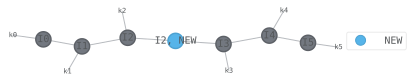

In [17]:
psi.split_tensor(
    # identify the tensor
    tags='I2',
    # here we give the right indices
    left_inds=None,
    right_inds=[psi.bond(2, 3)],
    # a new tag for the right factor
    rtags='NEW',
)

psi.draw('NEW')

#### Gauging


In [18]:
ta = qtn.rand_tensor([3, 3], ['a', 'b'], 'A')
tb = qtn.rand_tensor([3, 3, 3], ['b', 'd', 'e'], 'B')

#qtn.tensor_canonize_bond(ta, tb)
#ta | tb).draw(['A', 'B'], figsize=(4, 4), show_inds='all')


In [19]:
tb.data

array([[[ 0.69000797, -0.29740167,  1.56180002],
        [ 1.09534559,  0.07181359,  1.34616925],
        [-0.09905419,  0.16441914, -0.08527284]],

       [[-0.60094357, -0.2824281 ,  0.52335397],
        [-2.1027679 ,  0.44643792, -0.85761005],
        [-0.08527811,  1.40991781, -1.67434375]],

       [[-0.67976263, -0.13447105,  0.85994126],
        [-1.98047772, -2.53036864, -0.09465997],
        [ 0.92550926,  1.30795123, -0.74703522]]])

In [20]:
ta.data

array([[-0.31303836,  1.36004559, -0.02430757],
       [ 0.43753138,  0.68390888, -0.5076156 ],
       [-0.62092891,  1.12491568, -0.51362561]])

In [21]:

qtn.tensor_canonize_bond(ta, tb)
ta.data

array([[-0.38102396,  0.60916878,  0.69550999],
       [ 0.53255435,  0.75953243, -0.3734921 ],
       [-0.75578212,  0.22808743, -0.61381554]])

In [22]:
tb.data

array([[[ 1.08393774,  0.02217898,  0.86690118],
        [ 2.75971295, -0.71096036,  1.95513804],
        [ 0.12190352, -1.11446864,  1.51632733]],

       [[-0.61244683, -0.38357359,  0.39470804],
        [-2.34903276,  2.02581163, -1.3270714 ],
        [-0.61579088,  1.58537463, -2.29993265]],

       [[-0.33169401, -0.06561591,  0.41961319],
        [-0.96638527, -1.23470764, -0.04618987],
        [ 0.45160746,  0.63822218, -0.36452004]]])

#### Compressing


In [23]:
ta = qtn.rand_tensor([3, 3, 3], ['a', 'b', 'c'], 'A')
tb = qtn.rand_tensor([3, 3, 3, 3], ['c', 'd', 'e', 'f'], 'B')


In [24]:
ta.data

array([[[ 0.32741393, -1.22689617,  0.31366862],
        [-0.99846396,  0.42028904,  0.87111347],
        [ 2.37209904, -0.8252356 , -0.26354045]],

       [[ 1.01049506, -1.3168314 , -0.484039  ],
        [ 0.66881147, -0.49228364, -0.8382599 ],
        [ 1.67333091,  0.59218233, -0.62161825]],

       [[-0.04295915, -0.32600595, -0.02801918],
        [ 0.40323802,  1.95525936,  0.70477622],
        [-1.0194368 ,  0.06815352,  0.74931246]]])

In [25]:
tb.data

array([[[[-1.48256848, -0.49329729, -1.05239197],
         [ 0.34583337, -0.96753887,  0.25390405],
         [ 0.98088422, -0.54977243,  0.22541807]],

        [[ 0.31535041,  1.20156505, -0.71314815],
         [ 0.24033576,  1.18146857,  1.25251407],
         [ 0.27344568, -0.49492257,  0.10005712]],

        [[ 0.20077562, -0.41165952,  0.69655778],
         [ 1.06950175,  0.07955884,  1.84140878],
         [ 0.67109266,  0.69278386,  0.27080691]]],


       [[[-0.91573984, -0.51499159,  0.16197602],
         [-0.11278487, -0.2335602 ,  2.06371647],
         [-1.95985223, -0.03473196,  1.91712609]],

        [[ 1.33055257, -1.86832982,  0.38997145],
         [-0.60009165,  1.07524182, -0.72442521],
         [ 1.51768985, -0.91443574,  0.8602501 ]],

        [[ 0.11249319, -0.92244285, -0.94053457],
         [-0.16326892,  1.22411591, -1.41603204],
         [ 0.31965833,  2.14662566,  0.13286481]]],


       [[[-0.50000146,  0.44363926, -0.22737711],
         [-1.04656737,  0.62567279

In [26]:
qtn.tensor_compress_bond(ta, tb, max_bond=2, absorb='left')
ta.data

array([[[ -5.52354507,   3.92761616],
        [  6.53182109,   2.40894787],
        [-10.29746315,  -4.31358558]],

       [[ -9.60768231,   1.31797745],
        [ -5.94270227,  -1.1218391 ],
        [ -3.09926197,  -7.89054983]],

       [[ -1.41501315,   1.30461572],
        [  9.44226057,  -7.64894345],
        [  4.71399157,   3.63831734]]])

In [27]:
tb.data

array([[[[ 0.03953271,  0.02858366,  0.13286642],
         [-0.12496462,  0.13202803,  0.19541983],
         [-0.39223492,  0.14592036,  0.20135757]],

        [[ 0.1491896 , -0.47356018,  0.04233975],
         [-0.06652187, -0.04294734, -0.21841897],
         [ 0.17678508,  0.05299081,  0.01365711]],

        [[-0.09029302,  0.03507915, -0.23472403],
         [-0.13402257,  0.14408399, -0.38972332],
         [ 0.03354634,  0.25868826, -0.18270377]]],


       [[[ 0.34534124,  0.16374482,  0.1535389 ],
         [-0.08716772,  0.2192544 , -0.30016746],
         [ 0.04034053,  0.14789887, -0.26610324]],

        [[-0.19508401, -0.04710874,  0.02295956],
         [ 0.04999071, -0.34723551, -0.11784705],
         [-0.20995242,  0.25378319, -0.16454356]],

        [[-0.09470207,  0.23636154, -0.03076255],
         [-0.15569611, -0.15428937, -0.14741013],
         [-0.1080489 , -0.32261143, -0.16010812]]]])

#### TNLinearOperator

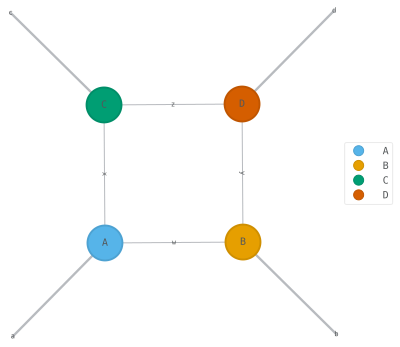

In [28]:
ta = qtn.rand_tensor([5, 2, 2], inds=['a', 'w', 'x'], tags='A')
tb = qtn.rand_tensor([5, 2, 2], inds=['b', 'w', 'y'], tags='B')
tc = qtn.rand_tensor([5, 2, 2], inds=['c', 'x', 'z'], tags='C')
td = qtn.rand_tensor([5, 2, 2], inds=['d', 'y', 'z'], tags='D')

#Creo que las dos cosas siguientes hacen los mismo

tn = (ta | tb | tc | td)


tn.draw(['A', 'B', 'C', 'D'], show_inds='all')

In [29]:

tn.arrays[0]

array([[[-1.1676322 , -0.47678764],
        [ 0.9174442 , -1.27573355]],

       [[ 1.10626211, -1.10072226],
        [-0.25732951,  0.89923174]],

       [[-1.52825909,  1.70165433],
        [-0.18095441,  0.25589024]],

       [[-0.22009491,  1.21639749],
        [ 0.8521866 ,  0.0490822 ]],

       [[ 1.47921539,  0.09895168],
        [ 0.24958046,  0.99332415]]])

In [30]:
tn.arrays[0][0][0][0]=9

In [31]:
tnlo = tn.aslinearoperator(['a', 'b'], ['c', 'd'])
qu.eigvals(tnlo, k=5, which='LM')


array([-9.07371133e+00-6.79106078j, -9.07371133e+00+6.79106078j,
       -1.15175030e-14+0.j        ,  8.92329403e+00-8.2722746j ,
        8.92329403e+00+8.2722746j ])

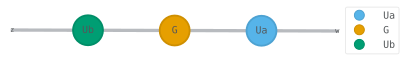

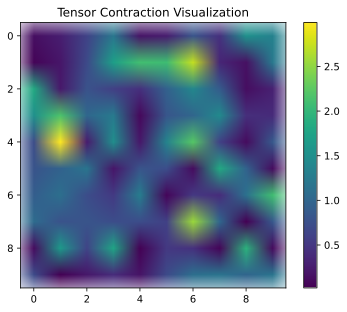

In [32]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import autoray as ar
import numpy as np
import quimb as qu
import quimb.tensor as qtn
Ua = qtn.PTensor(
    fn=qtn.decomp.isometrize_cayley,
    params=qu.identity(10, dtype="float64"),
    inds=["w", "x"],
    tags="Ua",
)

G = qtn.Tensor(
    data=qu.randn((10, 10)),
    inds=['x', 'y'],
    tags="G",
)

Ub = qtn.PTensor(
    fn=qtn.decomp.isometrize_cayley,
    params=qu.identity(10, dtype="float64"),
    inds=["y", "z"],
    tags="Ub",
)
(Ua | G | Ub).draw(["Ua", "G", "Ub"])
# If the tensor data is 2D, you can visualize it as a heatmap:
tensor_data = (Ua | G | Ub).contract().data

# If the tensor data is 2D, you can visualize it as a heatmap:
plt.imshow(np.abs(tensor_data), cmap='viridis', interpolation='none')
plt.colorbar()
plt.title("Tensor Contraction Visualization")
plt.show()

In [33]:
def loss(target, G):
    Ua, Ub = target["Ua"], target["Ub"]
    UGU = (Ua | G | Ub).contract(output_inds=['w', 'z']).data
    # minimize off-diagonal elements of UGU
    return ar.do("linalg.norm", UGU - ar.do('diag', ar.do('diag', UGU)))

In [34]:
tnopt = qtn.TNOptimizer(
    {"Ua": Ua, "Ub": Ub},
    loss,
    loss_constants=dict(G=G),
    optimizer="newton-cg",
    autodiff_backend="jax",
)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [35]:
to = tnopt.optimize(1000, hessp=True)

+0.001601124764 [best: +0.001601124764] :  57%|█████▊    | 575/1000 [00:01<00:00, 528.75it/s]


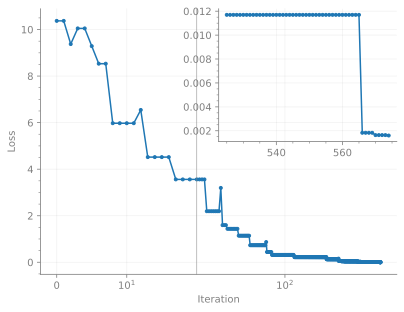

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Iteration', ylabel='Loss'>)

In [36]:
tnopt.plot()

In [37]:
Uao, Ubo = to["Ua"], to["Ub"]
Uao

PTensor(shape=(10, 10), inds=('w', 'x'), tags=oset(['Ua']))

In [38]:
# still orthogonal
Uao.norm()**2, Ubo.norm()**2

(10.000000000000002, 10.000000000000002)

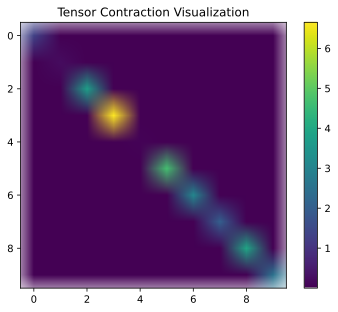

In [39]:


tensor_data = (Uao | G | Ubo).contract().data

# If the tensor data is 2D, you can visualize it as a heatmap:
plt.imshow(np.abs(tensor_data), cmap='viridis', interpolation='none')
plt.colorbar()
plt.title("Tensor Contraction Visualization")
plt.show()

In [2]:
# 10 qubits and tag the initial wavefunction tensors
circ = qtn.Circuit(N=10)

# initial layer of hadamards
for i in range(10):
    circ.apply_gate('H', i, gate_round=0)

# 8 rounds of entangling gates
for r in range(1, 9):

    # even pairs
    for i in range(0, 10, 2):
        circ.apply_gate('CX', i, i + 1, gate_round=r)

    # Y-rotations
    for i in range(10):
        circ.apply_gate('RZ', 1.234, i, gate_round=r)

    # odd pairs
    for i in range(1, 9, 2):
        circ.apply_gate('CZ', i, i + 1, gate_round=r)

    # X-rotations
    for i in range(10):
        circ.apply_gate('RX', 1.234, i, gate_round=r)

# final layer of hadamards
for i in range(10):
    circ.apply_gate('H', i, gate_round=r + 1)

circ

<Circuit(n=10, num_gates=252, gate_opts={'contract': 'auto-split-gate', 'propagate_tags': 'register'})>

In [3]:
rehs = circ.amplitude_rehearse()

# contraction width
W = rehs['tree'].contraction_width()
W

/home/sergio/.local/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:54: UserWarning: Couldn't find `optuna`, `baytune (btb)`, `chocolate`, `nevergrad` or `skopt` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(


8.0

In [4]:
# contraction cost
# N.B.
#       * 2  to get real dtype FLOPs
#       * 8  to get complex dtype FLOPs (relevant for most QC)
C = rehs['tree'].contraction_cost(log=10)
C

4.03996902686746

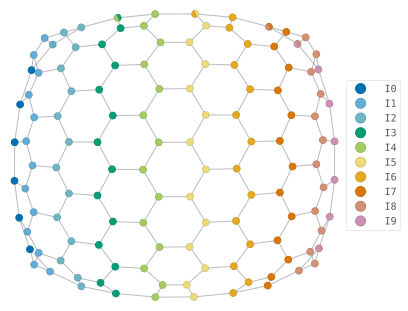

In [5]:
(
    circ
    # get the tensor network
    .amplitude_rehearse(simplify_sequence='R')['tn']
    # plot it with each qubit register highlighted
    .draw(color=[f'I{q}' for q in range(10)])
)

In [6]:
# compute the ZZ correlation on qubits 3 & 4
ZZ = qu.pauli('Z') & qu.pauli('Z')
where = (3, 4)

In [8]:
rehs = circ.local_expectation_rehearse(ZZ, where, optimize='greedy')
tn, tree = rehs['tn'], rehs['tree']
tree.contraction_cost()

424848

In [9]:
%%timeit
circ.local_expectation(ZZ, where, optimize='greedy')

53.7 ms ± 3.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit
tn.contract(all, optimize=tree, output_inds=())

3.7 ms ± 102 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
circ_ex = qtn.Circuit.from_gates(gen_gates())
circ_ex.amplitude_rehearse(optimize="greedy")

{'tn': TensorNetworkGenVector(tensors=672, indices=448),
 'tree': <ContractionTree(N=672)>,
 'W': 68.0,
 'C': 25.61388019089809}

In [16]:
circ = qtn.CircuitMPS.from_gates(
    gates=gen_gates(),
    max_bond=None,
    cutoff=1e-6,
    progbar=True,
)

max_bond=63, error~=0.000919:  77%|#######6  | 737/960 [03:47<01:08,  3.23it/s] 


KeyboardInterrupt: 

In [9]:
circ = qtn.CircuitPermMPS.from_gates(
    gates=gen_gates(),
    max_bond=None,
    cutoff=1e-6,
    progbar=True,
)

max_bond=2, error~=0:   0%|          | 0/960 [00:00<?, ?it/s]

max_bond=36, error~=0.0002:  59%|#####9    | 568/960 [00:08<00:05, 66.86it/s]   


SystemError: CPUDispatcher(<function svd_truncated_numba at 0x7fa96f579b40>) returned a result with an exception set

In [10]:
import torch

def to_backend(x):
    return torch.tensor(x, dtype=torch.complex64, device="cuda")

In [3]:
import torch

# Verifica que PyTorch está instalado
print("PyTorch version:", torch.__version__)

# Verifica si hay GPU disponible
if torch.cuda.is_available():
    print("CUDA is available!")
    print("GPU detected:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available.")

PyTorch version: 2.4.0+cu121
CUDA is available!
GPU detected: NVIDIA GeForce RTX 4060 Laptop GPU


In [14]:
circ = qtn.CircuitPermMPS.from_gates(
    # add 5 more layers of gates
    gen_gates(depth=15),
    cutoff=1e-6,
    # impose a hard bond dimension limit
    max_bond=1024,
    #to_backend=to_backend,
    progbar=True,
)

max_bond=888, error~=0.00449: 100%|##########| 1440/1440 [28:37<00:00,  1.19s/it]


In [18]:
circ = qtn.CircuitPermMPS.from_gates(
    # add 5 more layers of gates
    gen_gates(depth=15),
    cutoff=1e-6,
    # impose a hard bond dimension limit
    max_bond=None,
    to_backend=to_backend,
    progbar=True,
)

  0%|          | 0/1440 [00:00<?, ?it/s]

max_bond=1021, error~=0.272: 100%|##########| 1440/1440 [03:49<00:00,  6.27it/s]
